## Plot map of alternative climate divisions for Colorado (Figure 2.2)

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors
import numpy as np
import os

from metpy.plots import USCOUNTIES
from matplotlib.offsetbox import AnchoredText


### read in data file with clusters

In [2]:
## file with how many clusters?
nclusters = 11

cluster_tavg_prcp_sum = xr.open_dataset("data/clusters_tavg_prcp_sum_post1950_"+str(nclusters)+"_pub.nc").clusters_tavg_prcp_sum

cluster_tavg_prcp_sum


<xarray.DataArray 'clusters_tavg_prcp_sum' (lat: 98, lon: 170)>
[16660 values with dtype=int32]
Coordinates:
  * lat      (lat) float32 41.02 40.98 40.94 40.9 ... 37.1 37.06 37.02 36.98
  * lon      (lon) float32 -109.1 -109.0 -109.0 -108.9 ... -102.1 -102.1 -102.0

### make map with color shading

/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


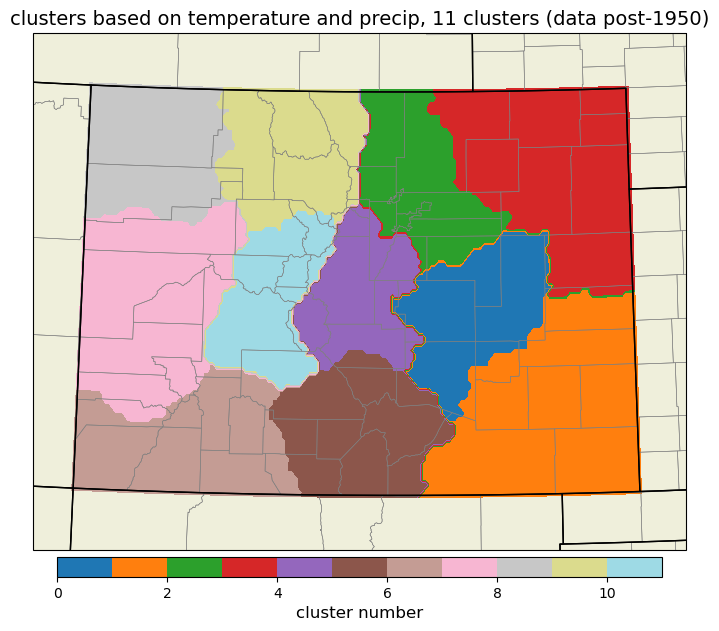

In [3]:
crs = ccrs.LambertConformal(central_longitude=-105.0, central_latitude=37.5)
#crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=42.0)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1,projection=crs)

## Colorado versions
lonmin=-109.5
lonmax=-101.5
latmin=36.4
latmax=41.5
#lonmin=-109.046667
#lonmax=-102.046667
#latmin=37.0
#latmax=41.0

#ax.set_extent([235., 290., 20., 55.])
#ax.set_extent((-109.5,-101.5,36.4,41.5))
ax.set_extent([lonmin,lonmax,latmin,latmax])
ax.add_feature(cfeature.LAND)
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor="gray", linewidth=0.4)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

## t rank
cf1 = ax.contourf(cluster_tavg_prcp_sum.lon, cluster_tavg_prcp_sum.lat, cluster_tavg_prcp_sum, 
                         np.arange(0,nclusters+1), 
                  cmap=plt.get_cmap('tab20'),
                  transform=ccrs.PlateCarree())

ax.set_title("clusters based on temperature and precip, "+str(nclusters)+" clusters (data post-1950)", fontsize=14)
cb1 = fig.colorbar(cf1, ax=ax, orientation='horizontal', aspect=30, shrink=0.65, pad=0.01)
cb1.set_label('cluster number', size='large')

fig.savefig("clusters_tavg_prcp_"+str(nclusters).zfill(2)+"clusters_post1950.png",
           dpi=225,transparent=False, facecolor='white', bbox_inches='tight')

plt.show()

plt.close('all')





### no color shading

/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/rschumac/mambaforge/envs/ats641_2023/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


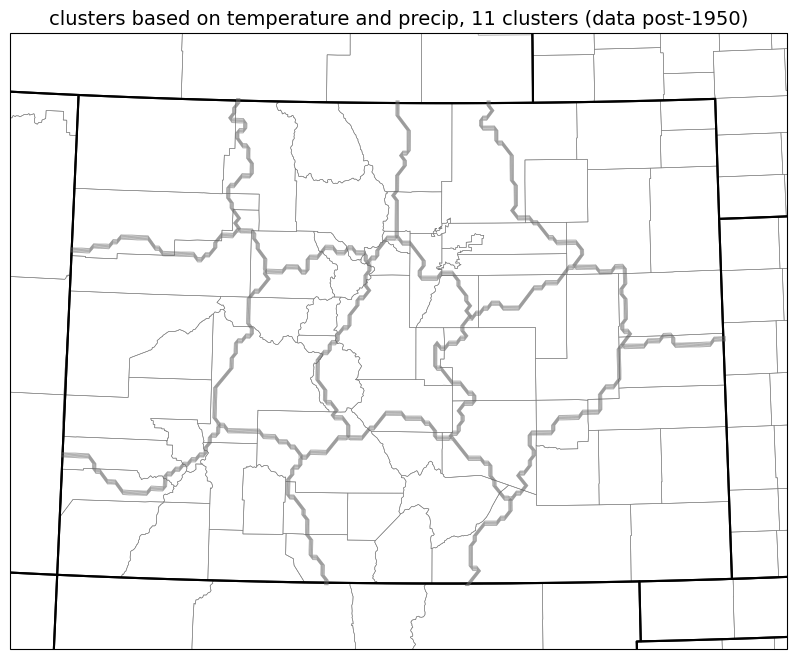

In [4]:
crs = ccrs.LambertConformal(central_longitude=-105.0, central_latitude=37.5)
#crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=42.0)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1,projection=crs)

## Colorado versions
lonmin=-109.5
lonmax=-101.5
latmin=36.4
latmax=41.5
#lonmin=-109.046667
#lonmax=-102.046667
#latmin=37.0
#latmax=41.0

#ax.set_extent([235., 290., 20., 55.])
#ax.set_extent((-109.5,-101.5,36.4,41.5))
ax.set_extent([lonmin,lonmax,latmin,latmax])
#ax.add_feature(cfeature.LAND)
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor="gray", linewidth=0.4)
ax.add_feature(cfeature.STATES, linewidth=1.5)
ax.add_feature(cfeature.BORDERS)

## t rank
#cf1 = ax.contourf(cluster_tavg_prcp_sum.lon, cluster_tavg_prcp_sum.lat, cluster_tavg_prcp_sum, 
#                         np.arange(0,nclusters+1), 
#                  cmap=plt.get_cmap('tab20'),
#                  transform=ccrs.PlateCarree())

## also lightly outline the divisions -- kind of hacky masking to make the contours all the same thickness
for div in range(1,12):
    mask_temp = xr.where(cluster_tavg_prcp_sum==div,1,0)
    ax.contour(mask_temp.lon, mask_temp.lat, mask_temp,
              #levels=[0],
               colors='dimgray',
               linewidths=0.15,
              transform=ccrs.PlateCarree())

ax.set_title("clusters based on temperature and precip, "+str(nclusters)+" clusters (data post-1950)", fontsize=14)
#cb1 = fig.colorbar(cf1, ax=ax, orientation='horizontal', aspect=30, shrink=0.65, pad=0.01)
#cb1.set_label('cluster number', size='large')

fig.savefig("clusters_tavg_prcp_"+str(nclusters).zfill(2)+"clusters_post1950_nocolor.pdf",
           dpi=225,transparent=False, facecolor='white', bbox_inches='tight')

plt.show()


plt.close('all')



